In [27]:
import os, sys
import healpy as h
from astropy.io import fits
sys.path.append(os.path.abspath("../"))
from modules.master import binned_master
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [95]:
nside=512 
lmax=3*nside

maskname="/Users/adityarotti/Documents/Work/Data/Planck/masks/COM_Mask_CMB-common-Mask-Pol_2048_R3.00.fits"
# maskname="/Users/adityarotti/Documents/Work/Data/Planck/masks/HFI_Mask_GalPlane-apo2_2048_R2.00.fits"

mask78=h.read_map(maskname,dtype=np.float64,verbose=False)
mask78=h.ud_grade(mask78,nside)
fsky78=sum(mask78)/size(mask78)

/opt/anaconda3/envs/hp/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/opt/anaconda3/envs/hp/lib/python3.7/site-packages/healpy/fitsfunc.py:426: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


In [96]:
fname143="/Users/adityarotti/Documents/Work/Data/Planck/maps/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits"
tqu=h.read_map(fname143,(0,1,2),dtype=np.float64,verbose=False)*1e6

In [102]:
bm=binned_master.binned_master(mask78,2,1024,1024,deltaell=1)

In [71]:
clthry=np.loadtxt("../planck_cmb_cl/cmb_cl.txt")

maxell=2048
ell=clthry[:maxell+1,0] ; fl=ell*(ell+1)/(2.*pi)
cltt=clthry[:maxell+1,1]/fl ; cltt=append([0.,0.],cltt)
clte=clthry[:maxell+1,2]/fl ; clte=append([0.,0.],clte)
clee=clthry[:maxell+1,3]/fl ; clee=append([0.,0.],clee)
clbb=clthry[:maxell+1,4]/fl ; clbb=append([0.,0.],clbb)
ell=append([0.,1,],ell) ; fl=ell*(ell+1)/(2.*pi)
clthr=[cltt,clee,clbb,clte]

cmb=h.synfast(clthr,nside,pol=True,new=True)

/opt/anaconda3/envs/hp/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  sigma * 60 * 180 / np.pi, sigma
/opt/anaconda3/envs/hp/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 0.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


In [28]:
beamfile="/Users/adityarotti/Documents/Work/Data/Planck/maps/HFI_RIMO_Beams-075pc_R2.00.fits"
f=fits.open(beamfile)
bl143=f[4].data[0][0][:lmax+1]
alm=h.map2alm(tqu,pol=True,lmax=lmax)
alm[0]=h.almxfl(alm[0],fl=1./bl143)
alm[1]=h.almxfl(alm[1],fl=1./bl143)
alm[2]=h.almxfl(alm[2],fl=1./bl143)
dec_teb=h.alm2map(alm,pol=False,nside=nside)

/opt/anaconda3/envs/hp/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  sigma * 60 * 180 / np.pi, sigma
/opt/anaconda3/envs/hp/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 0.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


In [108]:
idx=0
clcmb=h.alm2cl(h.map2alm(cmb[idx],lmax=1024))
cl=h.alm2cl(h.map2alm(cmb[idx]*mask78,lmax=1024))
mc_cl=bm.return_mcs(cl)

<IPython.core.display.Javascript object>


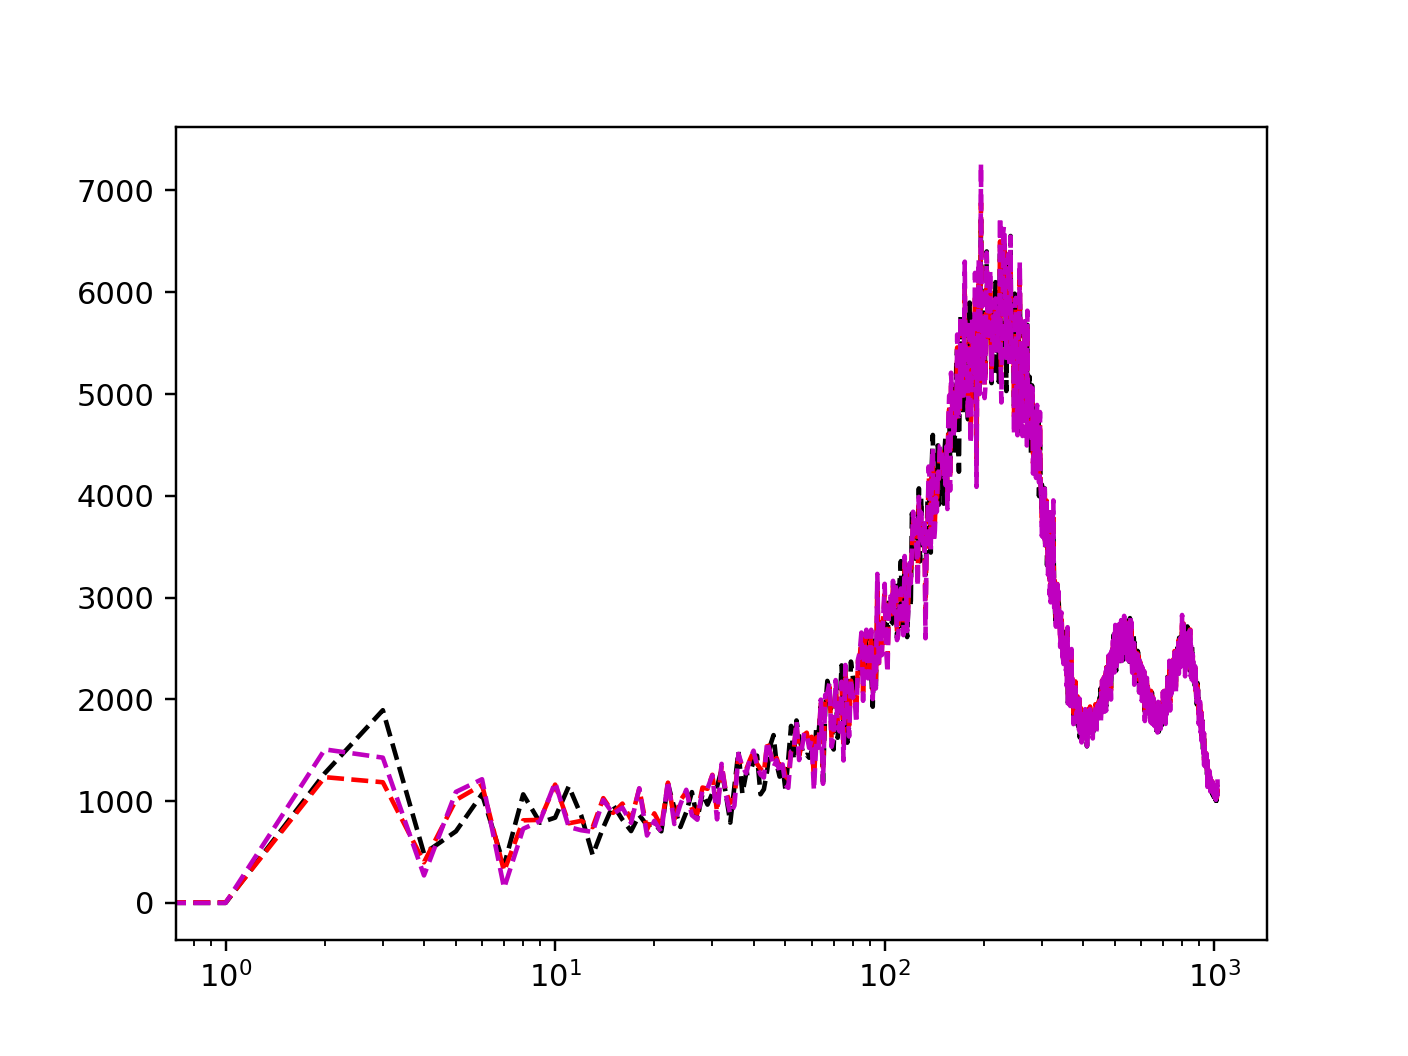

[]

In [110]:
ell=arange(1024+1)
fl=ell*(ell+1)/(2.*pi)
figure()
plot(ell,fl*clcmb,"k--")
plot(ell,fl*cl/fsky78,"r--")
plot(ell,fl*mc_cl,"m--")
# plot(mc_cl[0],mc_cl[1])

# loglog()
semilogx()

In [107]:
mc_cl[1]

array([nan, nan, nan, ..., nan, nan, nan])